In [41]:
from utils import *
import numpy as np
from scipy.signal import convolve2d
from queue import PriorityQueue
from dataclasses import dataclass


In [42]:
img = np.load('data_ps1.npz')
env = img['environment']
rod = img['rod']

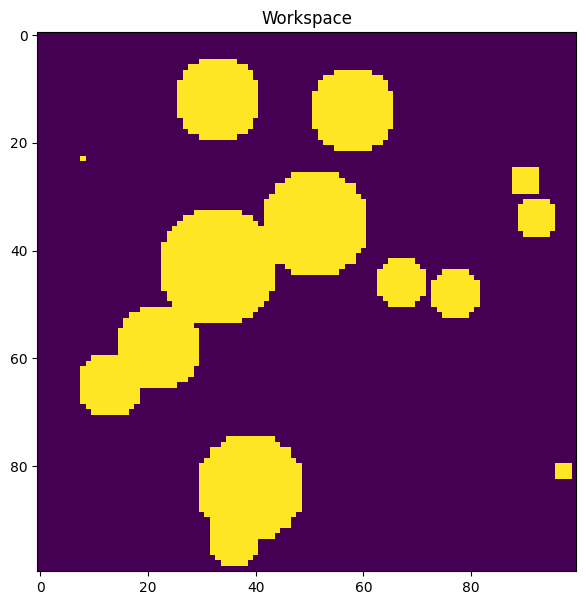

In [43]:
plt.figure(figsize=(14, 7))
plt.title("Workspace")
plt.imshow(env)
plt.show()

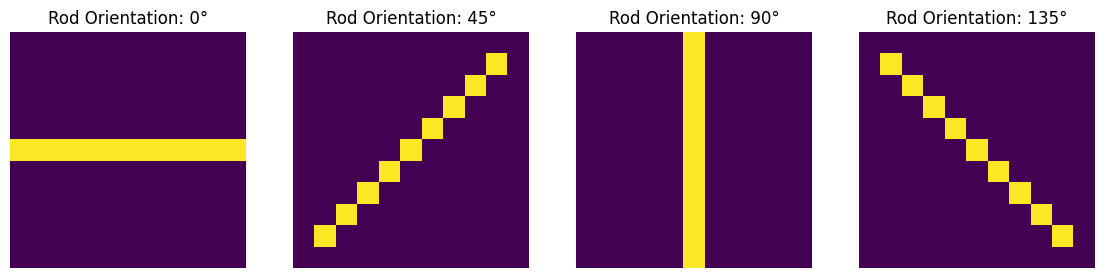

In [44]:
orientations = ["0°", "45°", "90°", "135°"]
fig, axs = plt.subplots(1, 4, figsize=(14, 7))
for i in range(4):
    axs[i].imshow(rod[:, :, i])
    axs[i].set_title(f"Rod Orientation: {orientations[i]}")
    axs[i].axis('off')
plt.show()

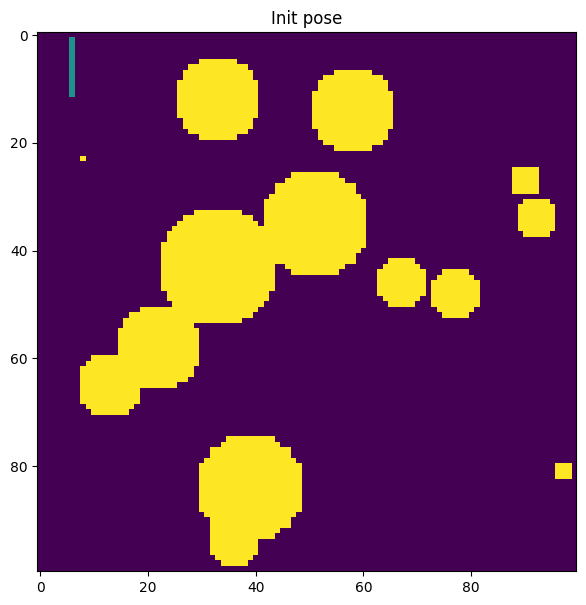

In [45]:
plt.figure(figsize=(14, 7))
plt.title("Init pose")
plt.imshow(plot_enviroment(img=env,obj=rod,state=(6,6,2)))
plt.show()

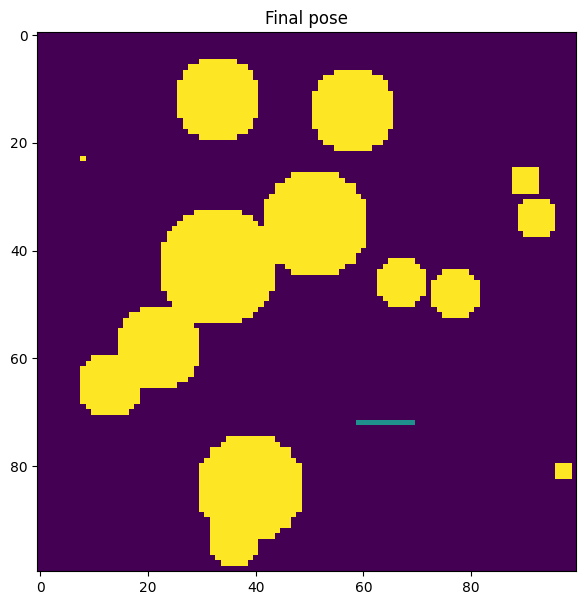

In [46]:
plt.figure(figsize=(14, 7))
plt.title("Final pose")
plt.imshow(plot_enviroment(img=env,obj=rod,state=(72,64,0)))
plt.show()

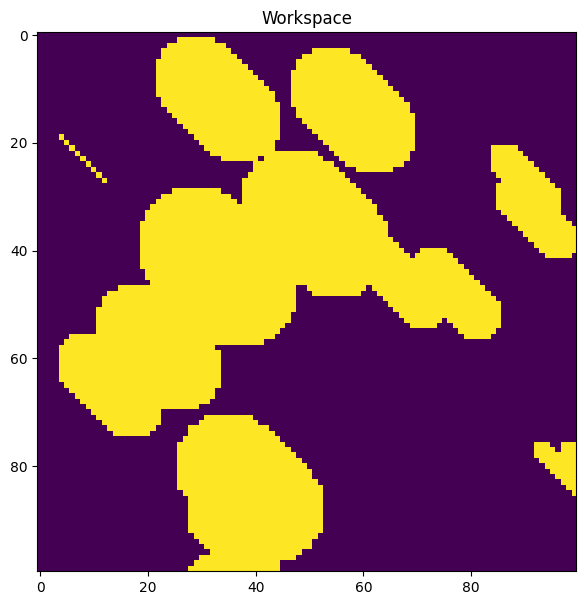

(4, 100, 100)

In [47]:
c_space = np.array([normalize_image(convolve2d(in1=env,in2=rod[:, :, i],boundary='symm', mode='same')) for i in range(4)])
plt.figure(figsize=(14, 7))
plt.title("Workspace")
plt.imshow(c_space[3])
plt.show()
c_space.shape

In [48]:
def a_star(init_pose: np.ndarray, final_pose: np.ndarray, map: np.ndarray):
    num_layers = map.shape[0]
    
    def heuristic(x1,x2):
        return 0
    
    def state_evolution(x_current,cost_current):
        """
        x: [x, y, theta, cost]
        """
        x = np.append(x_current,cost_current)
        xy_cost = 1
        rot_cost = 1
        transitions = np.array([
            [1,0,0,xy_cost],
            [-1,0,0,xy_cost],
            [0,1,0,xy_cost],
            [0,-1,0,xy_cost],
            [0,0,1,rot_cost],
            [0,0,-1,rot_cost]
        ])
        prob_x = x+transitions
        x = prob_x[np.all((prob_x[:,:1] > 0) & (prob_x[:,:1] < 100), axis=1)]
        x[:,-2] = x[:,-2] % num_layers
        return x
    
    class ParentTable:
        state: np.ndarray
        parent: np.ndarray
        cost: np.ndarray

    q = PriorityQueue()
    q.put((0,init_pose))
    already_visited = set(init_pose)

    while not q.empty():
        cost_current, x_current = q.get()
        if x_current == final_pose:
            print("We have a plan")
            return 
        x_future_list = state_evolution(x_current,cost_current)
        for x_future in x_future_list:
            if x_future[:3] not in already_visited:
                already_visited.add(x_future[:3])
                x_info = ParentTable(state=x_future[:3],
                                     parent=x_current,
                                     cost= x_future[3])
                q.put((x_info.cost,x_info))
                
                
                
        

In [49]:
# x = np.array([1,2,1,10])
# xy_cost = 1
# rot_cost = 10
# transitions = np.array([
#     [1,0,0,xy_cost],
#     [-1,0,0,xy_cost],
#     [0,1,0,xy_cost],
#     [0,-1,0,xy_cost],
#     [0,0,1,rot_cost],
#     [0,0,-1,rot_cost]
# ])
# prob_x = x+transitions
# print(prob_x)
# x = prob_x[np.all((prob_x[:,:1] > 0) & (prob_x[:,:1] < 100), axis=1)]
# x[:,:2]

/var/folders/m3/s66gcfbn4lj4tb84p633t5qc0000gn/T/ipykernel_43640/701915681.py:27: RuntimeWarning: overflow encountered in scalar add
  cost_future = cost_current + transition[3]


План найден
[(6, 6, 2), (6, 6, 1), (6, 6, 0), (6, 7, 0), (6, 8, 0), (6, 9, 0), (6, 10, 0), (6, 11, 0), (6, 12, 0), (6, 13, 0), (6, 14, 0), (6, 15, 0), (6, 16, 0), (6, 17, 0), (6, 18, 0), (6, 19, 0), (6, 20, 0), (7, 20, 0), (8, 20, 0), (9, 20, 0), (10, 20, 0), (11, 20, 0), (12, 20, 0), (13, 20, 0), (14, 20, 0), (15, 20, 0), (16, 20, 0), (16, 21, 0), (17, 21, 0), (18, 21, 0), (18, 22, 0), (19, 22, 0), (19, 23, 0), (19, 24, 0), (20, 24, 0), (20, 25, 0), (20, 26, 0), (20, 27, 0), (20, 28, 0), (20, 29, 0), (20, 30, 0), (20, 31, 0), (20, 32, 0), (20, 33, 0), (20, 34, 0), (20, 35, 0), (20, 36, 0), (20, 37, 0), (20, 37, 1), (20, 38, 1), (19, 38, 1), (19, 39, 1), (18, 39, 1), (18, 40, 1), (17, 40, 1), (17, 41, 1), (16, 41, 1), (16, 41, 2), (15, 41, 2), (14, 41, 2), (13, 41, 2), (12, 41, 2), (11, 41, 2), (10, 41, 2), (9, 41, 2), (8, 41, 2), (7, 41, 2), (6, 41, 2), (5, 41, 2), (5, 41, 3), (5, 42, 3), (5, 42, 0), (5, 43, 0), (5, 44, 0), (5, 45, 0), (5, 46, 0), (5, 47, 0), (5, 48, 0), (5, 49, 0), (

MovieWriter ffmpeg unavailable; using Pillow instead.


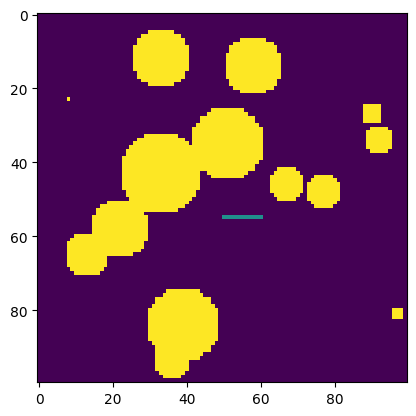

In [ ]:
import numpy as np
from queue import PriorityQueue

def a_star(init_pose: np.ndarray, final_pose: np.ndarray, env_map: np.ndarray):

    num_layers = env_map.shape[0]
    
    def heuristic(x1, x2):
        # return abs(x1[0]-x2[0])+abs(x1[1]-x2[1])
        return 0
    
    def state_evolution(x_current, cost_current):
        xy_cost = 1
        rot_cost = 1
        transitions = np.array([
            [1, 0, 0, xy_cost],
            [-1, 0, 0, xy_cost],
            [0, 1, 0, xy_cost],
            [0, -1, 0, xy_cost],
            [0, 0, 1, rot_cost],
            [0, 0, -1, rot_cost]
        ])
        
        future_states = []
        for transition in transitions:
            prob_x = x_current + transition[:3]
            cost_future = cost_current + transition[3]
            prob_x[2] %= num_layers  # normalizing angle
            
            x = prob_x[0]
            y = prob_x[1]
            theta = int(prob_x[2])
            
            # Calculating boundings of map 
            dim_y = int((rod.shape[0] - 1) / 2)
            dim_x = int((rod.shape[1] - 1) / 2)
            
            y_min = y - dim_y
            y_max = y + dim_y + 1
            x_min = x - dim_x
            x_max = x + dim_x + 1
            
            # make sure that the current pose are in the bounding of map
            if y_min < 0 or x_min < 0 or y_max > env_map.shape[1] or x_max > env_map.shape[2]:
                continue  # пропускаем это состояние
            
            # Check collision in the c_space
            if env_map[int(prob_x[2]), int(x), int(y)] == 0:
                future_states.append((prob_x, cost_future))
        return future_states

    q = PriorityQueue()
    q.put((0, tuple(init_pose))) 
    
    came_from = {}
    g_score = {tuple(init_pose): 0}
    f_score = {tuple(init_pose): heuristic(init_pose, final_pose)}
    
    already_visited = set()
    already_visited.add(tuple(init_pose))

    while not q.empty():
        _, x_current = q.get()
        
        if np.array_equal(x_current, final_pose):
            plan = []
            while tuple(x_current) in came_from:
                plan.append(x_current)
                x_current = came_from[tuple(x_current)]
            plan.append(init_pose)
            print("План найден")
            
            standardized_plan = [tuple(map(int, state)) for state in plan[::-1]]
            return standardized_plan 

        for prob_x, cost_future in state_evolution(np.array(x_current), g_score[x_current]):
            prob_x_tuple = tuple(prob_x)
            
            if prob_x_tuple in already_visited:
                continue
            
            tentative_g_score = g_score[x_current] + cost_future
            
            if prob_x_tuple not in g_score or tentative_g_score < g_score[prob_x_tuple]:
                came_from[prob_x_tuple] = x_current
                g_score[prob_x_tuple] = tentative_g_score
                f_score[prob_x_tuple] = tentative_g_score + heuristic(prob_x, final_pose)
                
                already_visited.add(prob_x_tuple)
                q.put((f_score[prob_x_tuple], prob_x_tuple))

    print("Путь не найден")
    return None 


init_pose = np.array([6, 6, 2])  
final_pose = np.array([72, 64, 0])   

path = a_star(init_pose, final_pose, c_space)

print(path)
len(path)
plotting_results(environment=env, rod=rod, plan=path, save_path='rod_solve.gif')
path = np.array(path)